### Let's say you are a dentist, and you would like to build a chatbot using RASA so that the customers can ask  simple queries like (address, timings, book appointments)


In [ ]:
!pip install -U ipython

In [2]:
# Installing rasa
!pip install rasa==1.10.3

     |████████████████████████████████| 510 kB 5.1 MB/s 
     |████████████████████████████████| 1.2 MB 64.7 MB/s 
     |████████████████████████████████| 56 kB 6.3 MB/s 
     |████████████████████████████████| 49 kB 6.8 MB/s 
     |████████████████████████████████| 3.2 MB 53.3 MB/s 
     |████████████████████████████████| 73 kB 2.1 MB/s 
     |████████████████████████████████| 40 kB 7.5 MB/s 
     |████████████████████████████████| 56 kB 6.8 MB/s 
     |████████████████████████████████| 5.1 MB 46.8 MB/s 
     |████████████████████████████████| 104 kB 78.4 MB/s 
     |████████████████████████████████| 47 kB 6.4 MB/s 
     |████████████████████████████████| 990 kB 55.4 MB/s 
     |████████████████████████████████| 1.3 MB 61.8 MB/s 
     |████████████████████████████████| 40 kB 7.1 MB/s 
     |████████████████████████████████| 60 kB 8.9 MB/s 
     |████████████████████████████████| 58 kB 7.9 MB/s 
     |████████████████████████████████| 417 kB 70.9 MB/s 
     |███████████████████████████

In [3]:
# donwload spacy
!python -m spacy download en

     |████████████████████████████████| 12.0 MB 5.3 MB/s 
✔ Download and installation successful
You can now load the model via spacy.load('en_core_web_sm')
✔ Linking successful
/usr/local/lib/python3.7/dist-packages/en_core_web_sm -->
/usr/local/lib/python3.7/dist-packages/spacy/data/en
You can now load the model via spacy.load('en')


In [4]:
# Installing nest_asyncio for nested event loops
!pip install nest_asyncio==1.3.3

  Attempting uninstall: nest-asyncio
    Found existing installation: nest-asyncio 1.5.4
    Uninstalling nest-asyncio-1.5.4:
      Successfully uninstalled nest-asyncio-1.5.4
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
nbclient 0.5.10 requires jupyter-client>=6.1.5, but you have jupyter-client 5.3.5 which is incompatible.


In [3]:
# importing libraries
import os
import rasa
import nest_asyncio

nest_asyncio.apply()
print("Event loop ready.")

Event loop ready.


In [4]:
# initilaise rasa project
from rasa.cli.scaffold import create_initial_project
project = "dentist_chatbot"
create_initial_project(project)

In [5]:
# moving to project directory
os.chdir(project)
print(os.listdir("."))

['__init__.py', 'tests', 'actions.py', 'endpoints.yml', 'config.yml', '__pycache__', 'domain.yml', 'credentials.yml', 'data']


In [6]:
ls

actions.py  credentials.yml  domain.yml     __init__.py   tests/
config.yml  data/            endpoints.yml  __pycache__/


In [7]:
config = "config.yml"
training_files = "data/"
domain = "domain.yml"
output = "models/"
print(config, training_files, domain, output)

config.yml data/ domain.yml models/


In [8]:
# initial train of rasa
model_path = rasa.train(domain, config, [training_files], output)
print(model_path)

Training Core model...


Processed trackers: 100%|██████████| 5/5 [00:00<00:00, 122.46it/s, # actions=16]
Processed actions: 16it [00:00, 727.33it/s, # examples=16]
Epochs: 100%|██████████| 100/100 [00:11<00:00,  8.51it/s, t_loss=0.092, loss=0.021, acc=1.000]


Core model training completed.
Training NLU model...


/usr/local/lib/python3.7/dist-packages/rasa/utils/common.py:363: UserWarning: You specified 'DIET' to train entities, but no entities are present in the training data. Skip training of entities.
Epochs: 100%|██████████| 100/100 [00:05<00:00, 17.57it/s, t_loss=1.485, i_loss=0.102, i_acc=1.000]


NLU model training completed.
Your Rasa model is trained and saved at '/content/dentist_chatbot/models/20220129-063809.tar.gz'.
models/20220129-063809.tar.gz


In [9]:
# initial running of rasa 
from rasa.jupyter import chat
endpoints = 'endpoints.yml'
chat(model_path, endpoints)

Your bot is ready to talk! Type your messages here or send '/stop'.
hi
Hey! How are you?
/stop


### Over writting of nlu, domain , stories files

In [15]:
%%writefile data/nlu.md

## intent:holiday
- do doctor available on sunday
- doctor available on sunday
- sunday holiday or not

## intent:time_available
- time
- at what time
- At what time doctor is available
- can you please say the timing

## intent:name_address
- Am [sam](name) and my number is [7894561237](number)
- [ram](name) [7894564567](number)

## intent:book_appoinment
- I would like book an appoinment
- Need an appoinment
- book appoinment
- I would like to consult doctor

## intent:greet
- hey
- hello
- hi
- good morning
- good evening
- hey there

## intent:goodbye
- bye
- goodbye
- see you around
- see you later

## intent:thanks
- thank you
- thank u

## intent:affirm
- yes
- indeed
- of course
- that sounds good
- correct

## intent:deny
- no
- never
- I don't think so
- don't like that
- no way
- not really

## intent:mood_great
- perfect
- very good
- great
- amazing
- wonderful
- I am feeling very good
- I am great
- I'm good

## intent:mood_unhappy
- sad
- very sad
- unhappy
- bad
- very bad
- awful
- terrible
- not very good
- extremely sad
- so sad

## intent:bot_challenge
- are you a bot?
- are you a human?
- am I talking to a bot?
- am I talking to a human?


Overwriting data/nlu.md


In [16]:
%%writefile domain.yml
intents:
  - greet
  - goodbye
  - affirm
  - deny
  - mood_great
  - mood_unhappy
  - bot_challenge
  - book_appoinment
  - name_address
  - time_available
  - holiday
  - thanks

responses:

  utter_thanks:
  - text:"Thank you for using our service"

  utter_holiday:
  - text:"Sunday is a holiday and doctor will not be avilable"

  utter_time_available:
  - text:"Doctor is available on 10am to 6pm"

  utter_name_address:
  - text:"Your booking is recorded"

  utter_book_appoinment:
  - text:"what is your name and mobile number ?"

  utter_greet:
  - text: "Hey! How are you?"

  utter_cheer_up:
  - text: "Here is something to cheer you up:"
    image: "https://i.imgur.com/nGF1K8f.jpg"

  utter_did_that_help:
  - text: "Did that help you?"

  utter_happy:
  - text: "Great, carry on!"

  utter_goodbye:
  - text: "Bye"

  utter_iamabot:
  - text: "I am a bot, powered by Rasa."

entities:
  - number
  - name

session_config:
  session_expiration_time: 60
  carry_over_slots_to_new_session: true


Overwriting domain.yml


In [17]:
%%writefile data/stories.md

## appoinment path
* greet
  - utter_greet
* book_appoinment
  - utter_book_appoinment
* name_address
  - utter_name_address
* time_available
  - utter_time_available
* thanks
  - utter_thanks

## holiday path
* greet
  - utter_greet
* holiday
  - utter_holiday

## happy path
* greet
  - utter_greet
* mood_great
  - utter_happy

## sad path 1
* greet
  - utter_greet
* mood_unhappy
  - utter_cheer_up
  - utter_did_that_help
* affirm
  - utter_happy

## sad path 2
* greet
  - utter_greet
* mood_unhappy
  - utter_cheer_up
  - utter_did_that_help
* deny
  - utter_goodbye

## say goodbye
* goodbye
  - utter_goodbye

## bot challenge
* bot_challenge
  - utter_iamabot


Overwriting data/stories.md


In [18]:
model_path =  rasa.train(domain, config, [training_files], output)
print(model_path)

/usr/local/lib/python3.7/dist-packages/rasa/core/domain.py:137: FutureWarning: Templates should not be strings anymore. Utterance template 'utter_thanks' should contain either a '- text: ' or a '- custom: ' attribute to be a proper template.
  utter_templates = cls.collect_templates(data.get("responses", {}))
/usr/local/lib/python3.7/dist-packages/rasa/core/domain.py:137: FutureWarning: Templates should not be strings anymore. Utterance template 'utter_holiday' should contain either a '- text: ' or a '- custom: ' attribute to be a proper template.
  utter_templates = cls.collect_templates(data.get("responses", {}))
/usr/local/lib/python3.7/dist-packages/rasa/core/domain.py:137: FutureWarning: Templates should not be strings anymore. Utterance template 'utter_time_available' should contain either a '- text: ' or a '- custom: ' attribute to be a proper template.
  utter_templates = cls.collect_templates(data.get("responses", {}))
/usr/local/lib/python3.7/dist-packages/rasa/core/domain.py

Training Core model...


Processed trackers: 100%|██████████| 7/7 [00:00<00:00, 103.36it/s, # actions=26]
Processed actions: 26it [00:00, 598.21it/s, # examples=26]
Epochs: 100%|██████████| 100/100 [00:18<00:00,  5.28it/s, t_loss=0.091, loss=0.002, acc=1.000]


Core model training completed.
Training NLU model...


Epochs: 100%|██████████| 100/100 [00:08<00:00, 12.36it/s, t_loss=1.956, i_loss=0.327, entity_loss=0.021, i_acc=1.000, entity_f1=0.779]


NLU model training completed.
Your Rasa model is trained and saved at '/content/dentist_chatbot/models/20220129-065052.tar.gz'.
models/20220129-065052.tar.gz


In [19]:
# Final Bot
endpoints = "endpoints.yml"
chat(model_path, endpoints)

Your bot is ready to talk! Type your messages here or send '/stop'.
hu
Hey! How are you?
need an appoinment
text:"what is your name and mobile number ?"
sam 1234567891
text:"Your booking is recorded"
time
text:"Doctor is available on 10am to 6pm"
thanks
text:"Thank you for using our service"
/stop


In [21]:
import rasa.data as data
stories_directory, nlu_data_directory = data.get_core_nlu_directories(training_files)
print(stories_directory, nlu_data_directory)

/tmp/tmpfdaggaqz /tmp/tmp7p01th0a


100%|██████████| 58/58 [00:00<00:00, 103.03it/s]


Done testing...


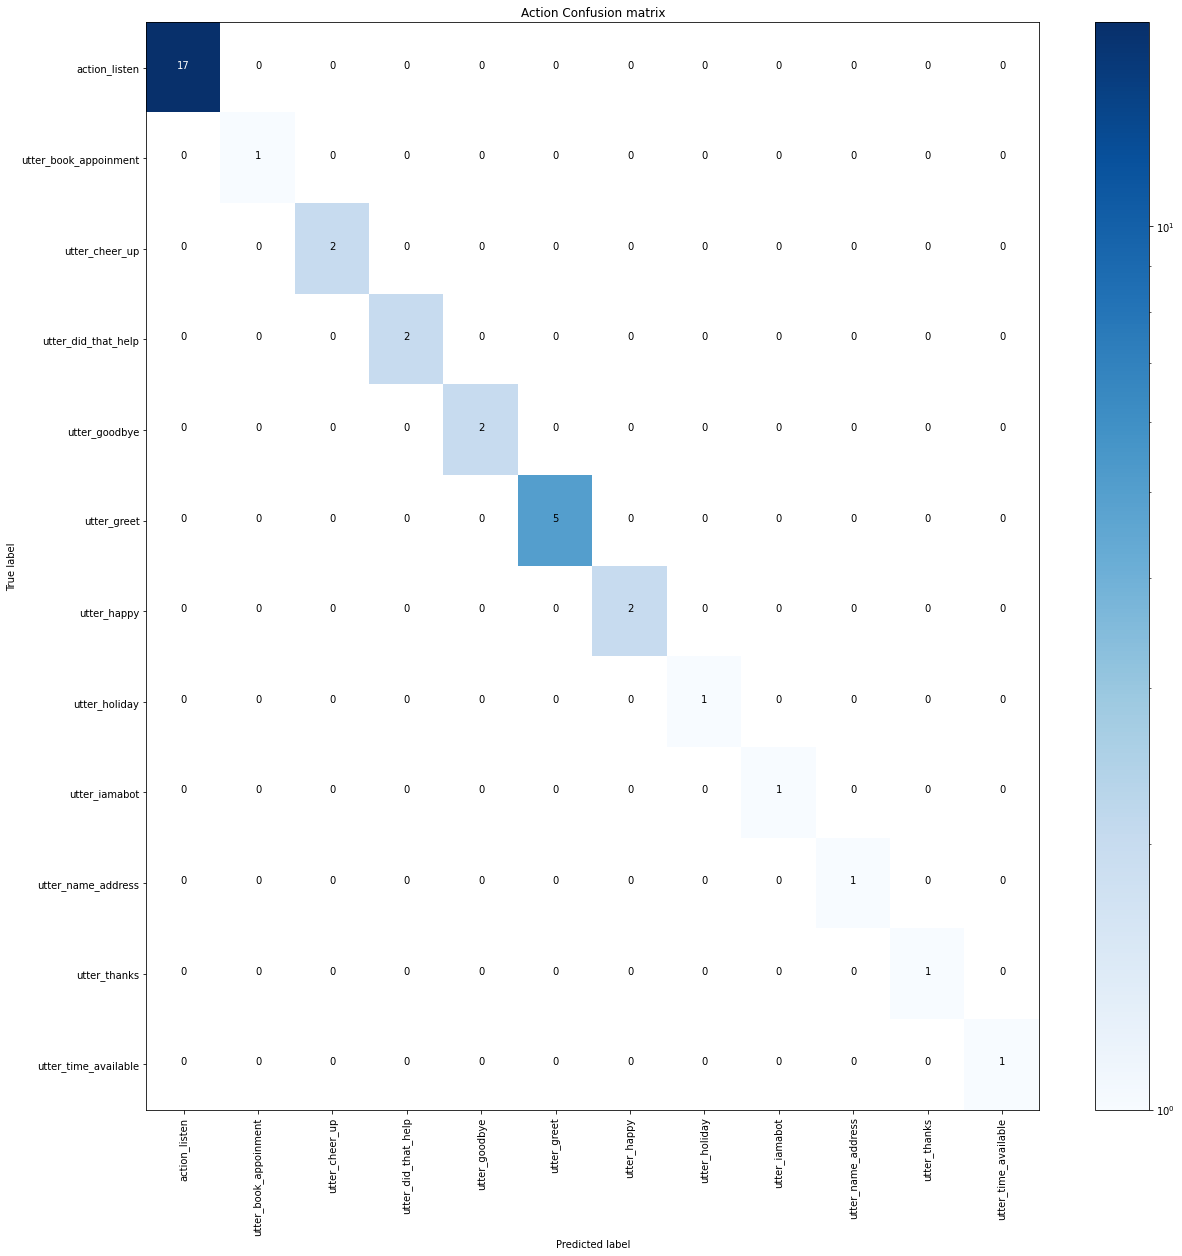

In [22]:
## testing of rasa
rasa.test(model_path, stories_directory, nlu_data_directory)
print("Done testing...")